# DeepLearning project with Tensorflow and MNIST

## Data Analysis

In [68]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.colors as mcolors

Here are some settings for the models, so that they have the same conditions.

In [69]:
batch_size = 32
epochs = 10

train set size:  60000  | test set size:  10000


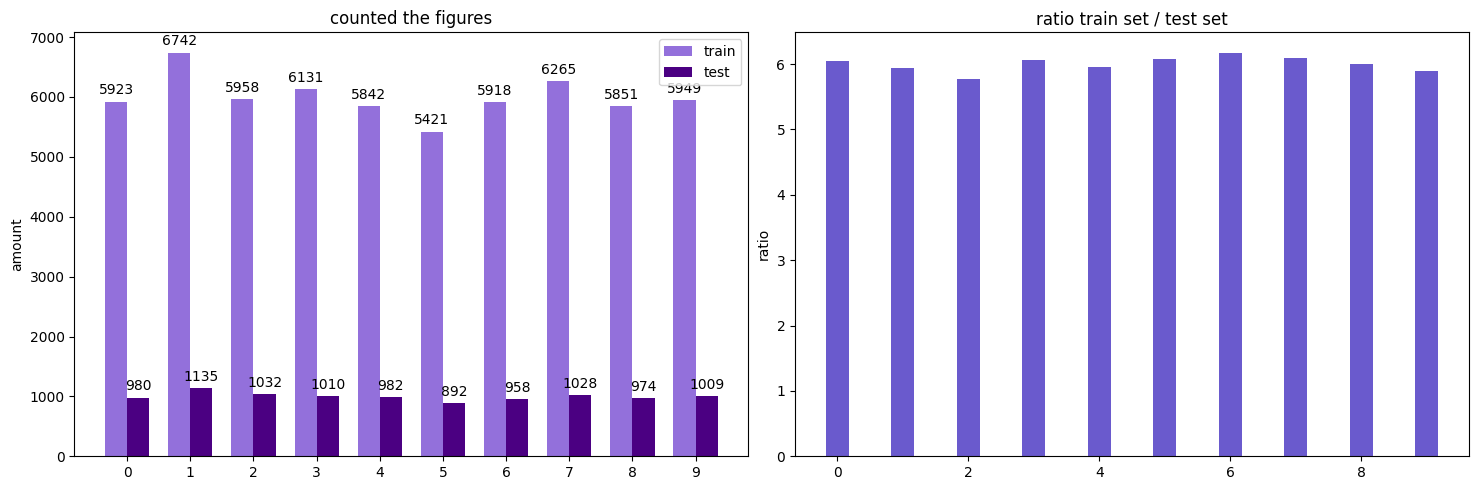

In [70]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

figure_train, count_train = np.unique(y_train, return_counts=True)
figure_test, count_test = np.unique(y_test, return_counts=True)
ratio = count_train/count_test
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
size_train = y_train.size
size_test = y_test.size
print("train set size: ", size_train, " | test set size: ", size_test)

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(1,2, figsize=(15, 5))
rects1 = ax[0].bar(x - width/2, count_train, width, label='train', color='mediumpurple')
rects2 = ax[0].bar(x + width/2, count_test, width, label='test', color='indigo')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[0].set_ylabel('amount')
ax[0].set_title('counted the figures')
ax[0].set_xticks(x, labels)
ax[0].legend()

ax[0].bar_label(rects1, padding=3)
ax[0].bar_label(rects2, padding=3)

fig.tight_layout()

ax[1].bar(x, ratio, width, label='train', color='slateblue')
ax[1].set_ylabel('ratio')
ax[1].set_title('ratio train set / test set')

plt.show()

Here you can see the distribution of the figures. They are not evenly distributed. In the training set (in blue) 1's are the most with 6742 and 5's are fewest with 5421. The test set is shown in orange. Let's have a loot at the ratios. To do so, the amount of train figures is divided by the amount of test figures.

You can see the ratios are around 6, like expected because there are 60000 train and 10000 test figures. The conclusion is that the distribution of the figure amounts of both sets are very similar.


 Plot of the first 10 samples in the MNIST training set


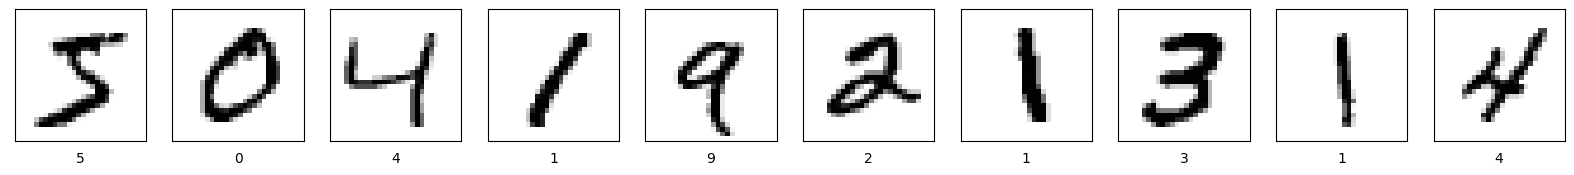

In [71]:
print('\n Plot of the first 10 samples in the MNIST training set')
plt.figure(figsize=(20,10))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

## Explainability


Starting with this basic model for reference. It includes just an input layer with 28 x 28 values and a dense (output) layer with 10 units. For comparability, these layers are gone be the same for the following models and this is the basic reference model to discuss changes.

In [72]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [73]:
model_ref = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model_ref.compile(
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_ref = model_ref.fit(
    x=x_train,
    y=y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test,y_test),
)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5583 - accuracy: 0.8639 - val_loss: 0.3400 - val_accuracy: 0.9082
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3321 - accuracy: 0.9066 - val_loss: 0.3114 - val_accuracy: 0.9152
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3100 - accuracy: 0.9122 - val_loss: 0.3007 - val_accuracy: 0.9179
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2994 - accuracy: 0.9169 - val_loss: 0.2981 - val_accuracy: 0.9202
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2937 - accuracy: 0.9190 - val_loss: 0.2959 - val_accuracy: 0.9215
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2893 - accuracy: 0.9205 - val_loss: 0.2958 - val_accuracy: 0.9217
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2870 - accuracy: 0.9218 - val_loss: 0.2965 - val_accuracy:

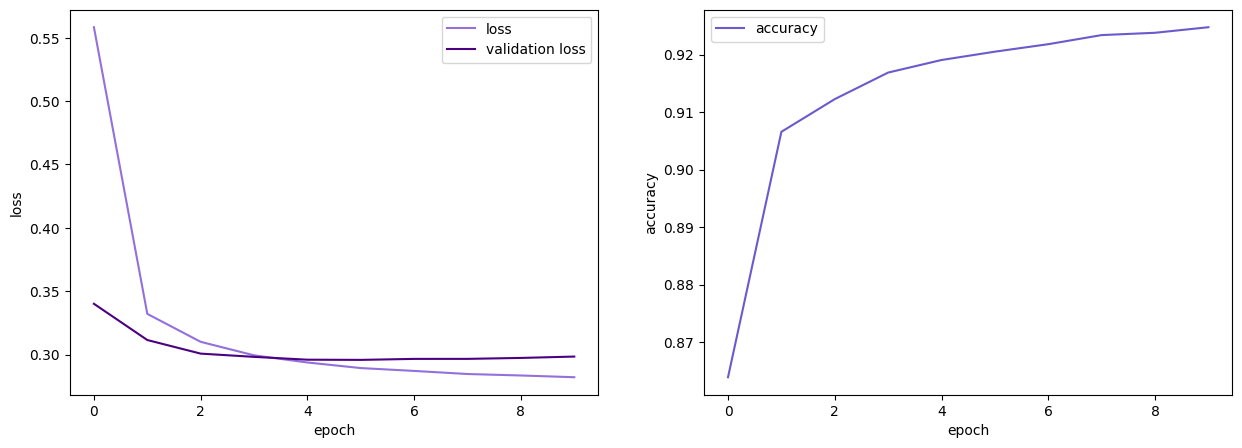

In [74]:
fig, axs = plt.subplots(1,2, figsize=(15, 5))

axs[0].plot(history_ref.history["loss"], color='mediumpurple')
axs[0].plot(history_ref.history["val_loss"], color='indigo')
# axs[0].ylabel("loss")
# axs[0].xlabel("epoch")
# axs[0].title("model loss")
axs[0].legend(["loss", "validation loss"], loc="best")
axs[0].set_xlabel('epoch')
axs[0].set_ylabel('loss')


axs[1].plot(history_ref.history["accuracy"], color='slateblue')
# axs[1].xlabel("epoch")
# axs[1].title("model accuracy")
axs[1].legend(["accuracy"], loc="best")
axs[1].set_xlabel('epoch')
axs[1].set_ylabel('accuracy')

plt.show()

This graph on the left is showing the loss of the test set and the loss of the validation set. On the right you can see the accuracy of the model.
The next models are keras core layers.

In [75]:
model_dense = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model_dense.compile(
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("\nStarting to train model with dense layer")
history_dense = model_dense.fit(
    x=x_train,
    y=y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test,y_test),
)


Starting to train model with dense layer
Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5438 - accuracy: 0.8563 - val_loss: 0.3327 - val_accuracy: 0.9109
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3220 - accuracy: 0.9096 - val_loss: 0.3000 - val_accuracy: 0.9150
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2959 - accuracy: 0.9168 - val_loss: 0.2863 - val_accuracy: 0.9194
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2840 - accuracy: 0.9201 - val_loss: 0.2856 - val_accuracy: 0.9203
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2774 - accuracy: 0.9229 - val_loss: 0.2846 - val_accuracy: 0.9218
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2725 - accuracy: 0.9235 - val_loss: 0.2824 - val_accuracy: 0.9240
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2690 - accuracy:

In [76]:
model_activation = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model_activation.compile(
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("\nStarting to train model with activation layer")
history_activation = model_activation.fit(
    x=x_train,
    y=y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test,y_test),
)


Starting to train model with activation layer
Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5594 - accuracy: 0.8638 - val_loss: 0.3456 - val_accuracy: 0.9063
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3326 - accuracy: 0.9056 - val_loss: 0.3113 - val_accuracy: 0.9142
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3100 - accuracy: 0.9129 - val_loss: 0.3003 - val_accuracy: 0.9172
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2993 - accuracy: 0.9164 - val_loss: 0.2984 - val_accuracy: 0.9194
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2935 - accuracy: 0.9194 - val_loss: 0.2958 - val_accuracy: 0.9215
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2898 - accuracy: 0.9209 - val_loss: 0.2977 - val_accuracy: 0.9204
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2865 - accu

In [78]:
model_conv2D = tf.keras.models.Sequential([
    # tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Conv2D(24,kernel_size=5,padding='same',activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model_conv2D.compile(
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("\nStarting to train model with Convolutional layer")
history_masking = model_conv2D.fit(
    x=x_train,
    y=y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test,y_test),
)


Starting to train model with Convolutional layer
Epoch 1/10


ValueError: in user code:

    File "c:\users\hoffm\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "c:\users\hoffm\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\users\hoffm\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "c:\users\hoffm\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\users\hoffm\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "c:\users\hoffm\appdata\local\programs\python\python39\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\users\hoffm\appdata\local\programs\python\python39\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\users\hoffm\appdata\local\programs\python\python39\lib\site-packages\keras\losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\users\hoffm\appdata\local\programs\python\python39\lib\site-packages\keras\losses.py", line 2084, in sparse_categorical_crossentropy
        return backend.sparse_categorical_crossentropy(
    File "c:\users\hoffm\appdata\local\programs\python\python39\lib\site-packages\keras\backend.py", line 5630, in sparse_categorical_crossentropy
        res = tf.nn.sparse_softmax_cross_entropy_with_logits(

    ValueError: `labels.shape` must equal `logits.shape` except for the last dimension. Received: labels.shape=(32,) and logits.shape=(6272, 10)


In [ ]:
model_lambda = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Lambda(lambda x: x ** 2),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model_lambda.compile(
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("\nStarting to train model with lambda layer")
history_lambda = model_lambda.fit(
    x=x_train,
    y=y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test,y_test),
)

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(20, 10))

axs[0,0].plot(history_ref.history["loss"])
axs[0,0].plot(history_dense.history["loss"])
axs[0,0].plot(history_activation.history["loss"])
axs[0,0].plot(history_masking.history["loss"])
axs[0,0].plot(history_lambda.history["loss"])

axs[0,0].legend(["ref", "dense", "activation", "masking", "lambda"], loc="best")
axs[0,0].set_xlabel('epoch')
axs[0,0].set_ylabel('loss')


axs[0,1].plot(history_ref.history["val_loss"])
axs[0,1].plot(history_dense.history["val_loss"])
axs[0,1].plot(history_activation.history["val_loss"])
axs[0,1].plot(history_masking.history["val_loss"])
axs[0,1].plot(history_lambda.history["val_loss"])

axs[0,1].legend(["ref", "dense", "activation", "masking", "lambda"], loc="best")
axs[0,1].set_xlabel('epoch')
axs[0,1].set_ylabel('loss')


axs[1,0].plot(history_ref.history["accuracy"])
axs[1,0].plot(history_dense.history["accuracy"])
axs[1,0].plot(history_activation.history["accuracy"])
axs[1,0].plot(history_masking.history["accuracy"])
axs[1,0].plot(history_lambda.history["accuracy"])

axs[1,0].legend(["ref", "dense", "activation", "masking", "lambda"], loc="best")
axs[1,0].set_xlabel('epoch')
axs[1,0].set_ylabel('accuracy')


axs[1,1].plot(history_ref.history["val_accuracy"])
axs[1,1].plot(history_dense.history["val_accuracy"])
axs[1,1].plot(history_activation.history["val_accuracy"])
axs[1,1].plot(history_masking.history["val_accuracy"])
axs[1,1].plot(history_lambda.history["val_accuracy"])

axs[1,1].legend(["ref", "dense", "activation", "masking", "lambda"], loc="best")
axs[1,1].set_xlabel('epoch')
axs[1,1].set_ylabel('accuracy')

plt.show()

We can see the layers behave different, especially the dense layer. Just this one 10 unit dense layer is improving the model decisive. It seems like the other ones do not have a noticeable influence at all. Let's take a look at each layer and try to understand them.

**Dense layer**: The first parameter amount of units (10) and the input size are telling the system how the weight matrix should be created. At the same time this is the output size of this layer. In this way as an output layer (like in the base model) the highest value can be taken as prediction.

**Activation layer**: This layer applies an activation function to an output. In this case the 'relu' function, which just converts all negative input values into 0's and leaves the others as usual. In the MNIST data set are no negative values, so it is clear that this layer does not have a noticeable impact.

**Convolutional layer**: Different to the dense layer this layer is not working on pixel level. It can recognize patterns like lines or areas. This behaviour is interesting for image recognition.

**Lambda layer**:

## Performance

ads